### IBM HR Analytics Employee Attrition & Performance

![Getting Started](empleados2.jpg)

Image https://unsplash.com/@anniespratt

Attrition is the silent killer that can swiftly disable even the most successful and stable of organizations in a shockingly spare amount of time. While many companies put an emphasis on the costly process of hiring and recruiting, there isn’t enough attention invested in solving the issues that cause top talent to leave. Although compensation is the most commonly associated reason behind attrition, let's make an analysis to see if this is really one of the most important motives ¡¡¡

Understanding the motivations behind employee attrition is the essential first step in understanding the problem and properly addressing it before substantial, long-lasting damage is caused to your organization. Thankfully, with this EDA we will be able to provide employers the actionable insights they need to better understand their employees and make any necessary changes before turnover rates swell, productivity drops, and the entire company’s future is suddenly less bright.

### What does employee attrition mean?
The attrition rate is a calculation of the number of individuals that leave or move out of a business over a specified time frame.

### What is the difference between employee turnover and attrition?
Both terms are used when an employee leaves a company but with a difference in processes, such as discharge, termination, or resignation. Attrition occurs when an employee retires or when the employer terminates the job position. When employee turnover occurs, the employers look for a replacement.

### What is a good employee attrition rate?
A good, average turnover rate is around 10%.

### What are some effective methods to reduce a high attrition rate?
* Recruit and hire the right people.
* Offer benefits and compensation.
* Offer flexibility.
* Pay attention to employee engagement.
* Recognize and reward employees.

Well, let's get down to work then, let's see what's going on at IBM!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'
sns.set_style("white")
rcParams['figure.figsize'] = 6,4
import matplotlib.ticker as ticker

In [3]:
path = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(path)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


Do we have null values ?

In [4]:

null = df.isnull().sum() 
null[null > 0] # Noo, fortunately there are none

Series([], dtype: int64)

Let's convert our output variable from categorical to numerical

In [5]:
y_dict = {"Yes":1,"No":0}
df["Attrition_numeric"] = df["Attrition"].map(y_dict)


These columns are of no use to us, throw them away!

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours',"Attrition"], axis="columns", inplace=True)

Let's make a quick summary of the variables and see what we find ¡

In [7]:
#describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


* The average age is 36 years, there are very young people with 18 years (young trainees or interns?) and people with 60 years (managers with many years of work?).
* There are people who live very close to work, almost next door, and others are almost an hour's drive away!
* Salaries are a world of their own! The average is 6500 usd, the lowest earners reach 1000 usd (the young trainees?) and the highest earners almost 20000 usd (that 60 year old boss with many years behind him?).
* There are employees who have been working for almost 40 years and others who have just started! The average, however, is 7 years (I don't think that's bad at all).

We are going to separate the workers into two dataframes according to Attrition and compare their averages

In [8]:
attrition_yes = df.loc[df["Attrition_numeric"] == 1]
attrition_no = df.loc[df["Attrition_numeric"] == 0]


In [9]:
# I use concat to join the two DF, rename the columns and then give it some color :)
df_mean_attrition = pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)
df_mean_attrition.columns = ["Yes","No"]
df_mean_attrition.round(2).style.background_gradient(cmap="tab20_r",axis=1)

,Yes,No
Age,33.610000,37.560000
DailyRate,750.360000,812.500000
DistanceFromHome,10.630000,8.920000
Education,2.840000,2.930000
EnvironmentSatisfaction,2.460000,2.770000
HourlyRate,65.570000,65.950000
JobInvolvement,2.520000,2.770000
JobLevel,1.640000,2.150000
JobSatisfaction,2.470000,2.780000
MonthlyIncome,4787.090000,6832.740000


### Characteristics of employees who want to leave the IBM company

* They tend to be younger, 33 years old on average, they tend to live farther from work, they are less satisfied with the work environment, they have lower incomes (everything is correlated because it is normal to earn more the more years you are in the company).
* They have been working less years, they have less rights to stock options (as before, the more years in the company, the more rights you have).

### What is a good employee attrition rate?
A good average turnover rate is around 10%.


In [10]:
tasa_att = (df["Attrition_numeric"].sum() / df.shape[0]) * 100
print("Average Turnover rate at IBM is :",round(tasa_att,2))

Average Turnover rate at IBM is : 16.12


Ummmm the average is very high compared to what would be normal, we will have to keep on working...this also represents a problem when making predictions since the classes are not balanced.

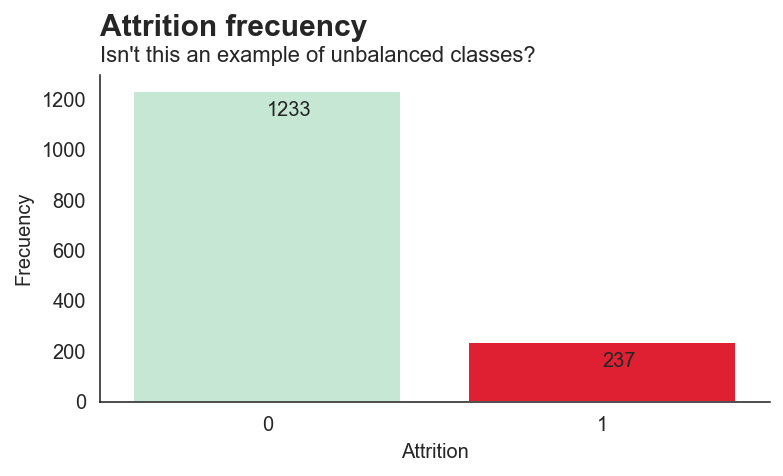

In [11]:
# let,s plot "Attrition frecuency"
colors = ["#C0EDD2","#FF0018"]
df_class = df["Attrition_numeric"].value_counts().reset_index()
plt.figure(figsize=(6,3))
ax = sns.barplot(x="index",y="Attrition_numeric",data=df_class,palette=colors)
sns.despine()
# another way to make titles more personalized
# plt.title("$\\bf{Attrition frecuency}$" +"\nIsn't this an example of unbalanced classes?")
ax.text(-0.5,1450,"Attrition frecuency",
        fontsize=15,        
         fontweight='bold') 
ax.text(-0.5,1350,"Isn't this an example of unbalanced classes?",
        fontsize=11)
# with a loop I add the values to the graphic text(x,y,s="values")
for num,text in enumerate(df_class["Attrition_numeric"]):
        ax.text(num,text-100,text)
plt.xlabel("Attrition")
plt.ylabel("Frecuency")
# so only the graphic appears without any text referring to the object type.
plt.show(block=False)

I am going to separate the numerical columns from the categorical columns; using describe makes it very easy 

In [12]:
# numeric and categoric
num_col = df.describe().columns.tolist()
cat_col = df.describe(include="object").columns.tolist()

### Detecting Multicollinearity
I will make a heatmap to see the correlation between the variables. 

In [13]:
## corr
corr = df[num_col].corr()

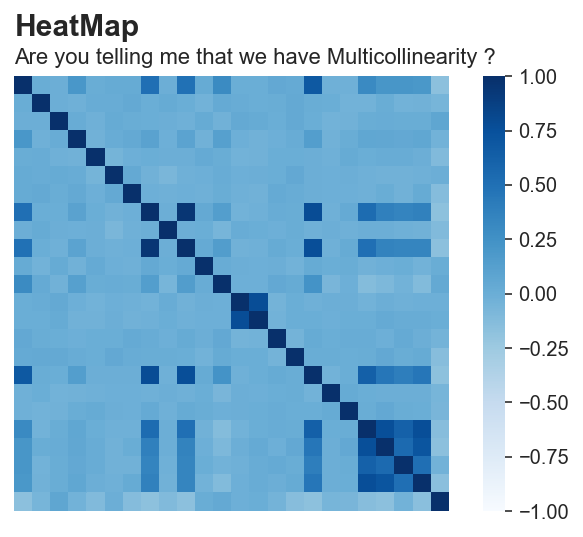

In [14]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="Blues",
    square=True,xticklabels=False, yticklabels=False)
#plt.title("HeatMap of all the Feature Variables",fontweight="bold")
ax.text(0,-2.2,"HeatMap",
        fontsize=15,        
         fontweight='bold') 
ax.text(0,-.7,"Are you telling me that we have Multicollinearity ?",
        fontsize=11)      
         
         

plt.show(block=False)

we see that there is Multicollinearity; it is normal because there are variables that are related to each other, for example salary and working years. Further on we will see which are the most important variables, for example using a PCA.

Now, the correlation with respect to our output variable; we see interesting things that affect directly proportional as DistanceFromHome,NumCompaniesWorked and indirectly proportional as ,for example,MonthlyIncome,TotalWorkingYears,YearsWithCurrManager and Age

In [15]:
#to_frame().style.background_gradient(cmap='viridis')
corr["Attrition_numeric"].to_frame().style.background_gradient(cmap="Blues") #sns.diverging_palette(150,80,n=200,as_cmap=True))

,Attrition_numeric
Age,-0.159205
DailyRate,-0.056652
DistanceFromHome,0.077924
Education,-0.031373
EnvironmentSatisfaction,-0.103369
HourlyRate,-0.006846
JobInvolvement,-0.130016
JobLevel,-0.169105
JobSatisfaction,-0.103481
MonthlyIncome,-0.159840


### A quick summary of the categorical variables!

In [16]:
df.describe(include="object").T

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


We see that the most frequent in this company is a person who travels rarely, from the Research & Development department , educated in Life Sciences , gender Male, Married, Sales Executive and no OverTIme

### Visualizing data is always a great help, let's get to it!

I want to see if traveling a lot for work has any effect on employee morale.

In [17]:
# groupby
by_bussines =df.groupby("BusinessTravel")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()

In [36]:
by_bussines

Attrition_numeric          
Attrition_numeric                 0         1
BusinessTravel                               
Non-Travel                 0.920000  0.080000
Travel_Frequently          0.750903  0.249097
Travel_Rarely              0.850431  0.149569

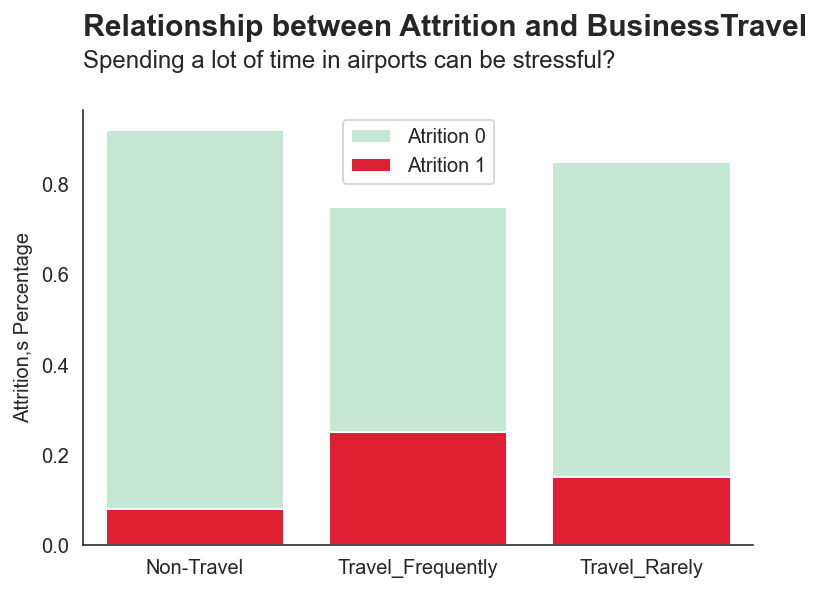

In [18]:
# bussines travel
#colors = ["#C0EDD2","#FF0018"]
plt.figure(figsize=(6,4))
ax= sns.barplot(x=by_bussines.index,y=('Attrition_numeric', 0),data=by_bussines,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_bussines.index,y=('Attrition_numeric', 1),data=by_bussines,color="#FF0018",label="Atrition 1")
plt.ylabel('')
plt.ylabel("Attrition,s Percentage")
plt.xlabel("")
plt.grid(False)
sns.despine()
plt.legend()
# using text to personalize title
ax.text(-.5,1.13,"Relationship between Attrition and BusinessTravel",
        fontsize=15,        
         fontweight='bold') 
ax.text(-.5,1.06,"Spending a lot of time in airports can be stressful?",
        fontsize=12)   
plt.show(block=False)

well, we can see that among employees who travel a lot, the attrition rate is much higher. Let's make a pivot table to check the data more thoroughly

In [19]:
df.pivot_table("Attrition_numeric",index="JobRole",columns=["BusinessTravel"])

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
JobRole,,,
Healthcare Representative,0.066667,0.115385,0.055556
Human Resources,0.000000,0.400000,0.210526
Laboratory Technician,0.071429,0.313725,0.244444
Manager,0.083333,0.000000,0.051948
Manufacturing Director,0.000000,0.103448,0.067961
Research Director,0.000000,0.000000,0.032258
Research Scientist,0.142857,0.277778,0.133333
Sales Executive,0.102564,0.220339,0.175439
Sales Representative,0.000000,0.652174,0.327273


we can see that among the sales representatives who travel a lot, 65 percent are not very happy; and it is also significant in Human resources: there are 40 percent of the employees who travel a lot who are not very happy either.

Let's check by department what the the attrition rate is 

In [20]:
# groupby by jobrole (to_frame and unstack it's not necessary, I did it this way because I was playing with dataframe and colors.)
by_jobRole =df.groupby("JobRole")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()


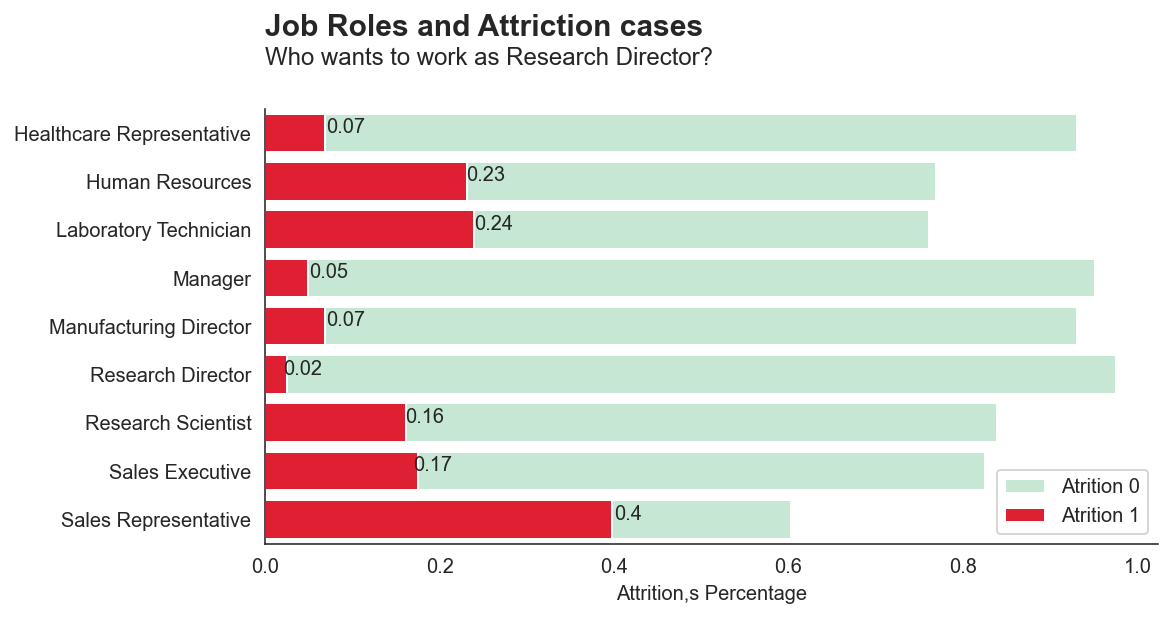

In [21]:
#plot
plt.figure(figsize=(8,4))
ax=sns.barplot(y=by_jobRole.index,x=('Attrition_numeric', 0),data=by_jobRole,color="#C0EDD2",label="Atrition 0")
sns.barplot(y=by_jobRole.index,x=('Attrition_numeric', 1),data=by_jobRole,color="#FF0018",label="Atrition 1")


plt.ylabel("")
plt.xlabel("Attrition,s Percentage")
plt.grid(False)
sns.despine()
plt.legend()
ax.text(0,-2,"Job Roles and Attriction cases",
        fontsize=15,        
         fontweight='bold') 
ax.text(0,-1.4,"Who wants to work as Research Director?",
        fontsize=12)
# with a loop I add the values to the graphic
for num,text in zip(range(9),round(by_jobRole['Attrition_numeric', 1],2)):
    ax.text(text,num,text)
plt.show(block=False)

There are three departments where the attrition rate it is higher than usual: Sales Representative,Human Resources and Laboratoy Thecnician

In [22]:
by_department =df.groupby("Department")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()
# by_department.style.background_gradient(cmap='Blues',axis=0) thats other way to visualize the data

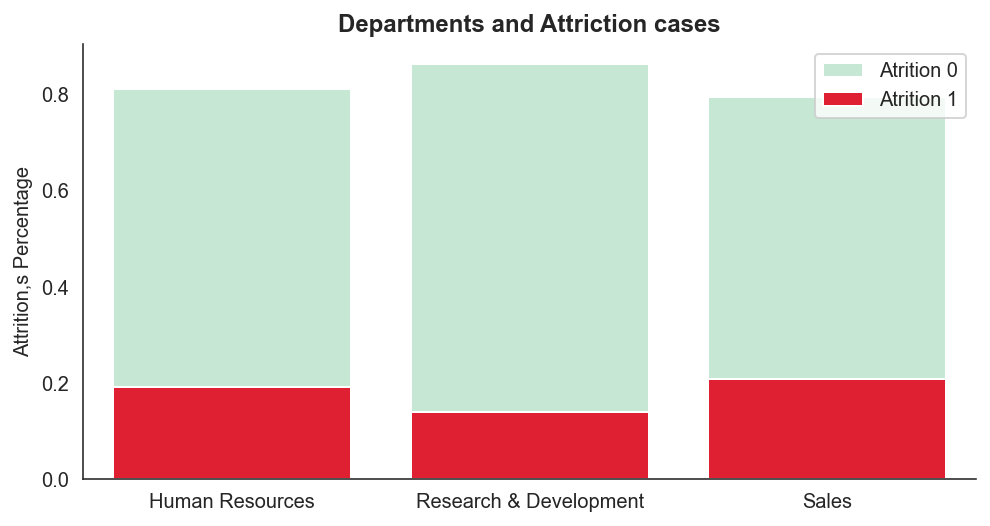

In [23]:
#department
#colors = ["#C0EDD2","#FF0018"]
plt.figure(figsize=(8,4))
sns.barplot(x=by_department.index,y=('Attrition_numeric', 0),data=by_department,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_department.index,y=('Attrition_numeric', 1),data=by_department,color="#FF0018",label="Atrition 1")
plt.ylabel('')
plt.title("Departments and Attriction cases",fontweight="bold")
plt.xlabel("")
plt.ylabel("Attrition,s Percentage")
plt.grid(False)
plt.legend()
sns.despine()

### Age

let's look at age!  the attrition rate is higher in younger people.

First we use the cut function to create four groups according to their ages and then groupby and value counts(normalize) to see the percentages. between 18 and 30 the attrition rate  is the highest!

In [24]:
cut_age = pd.cut(df["Age"],bins=[18,30,50,60],include_lowest=False)
df.groupby(cut_age)["Attrition_numeric"].value_counts(normalize=True).unstack()

Attrition_numeric,0,1
Age,,
"(18, 30]",0.746032,0.253968
"(30, 50]",0.873539,0.126461
"(50, 60]",0.874126,0.125874


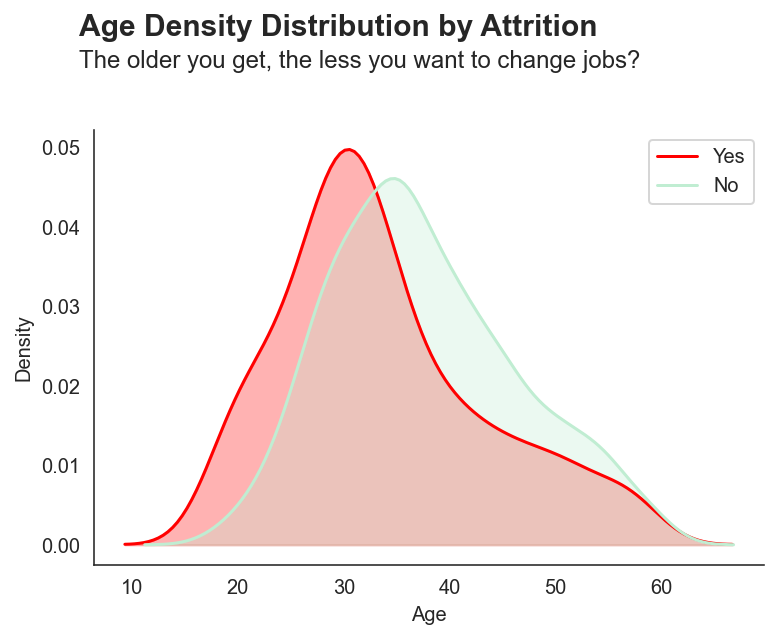

In [25]:
# age
plt.figure(figsize=(6,4))
ax = sns.distplot(attrition_yes["Age"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["Age"],hist=False,label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(5,0.064,"Age Density Distribution by Attrition",
        fontsize=15,        
         fontweight='bold') 
ax.text(5,0.06,"The older you get, the less you want to change jobs?",
        fontsize=12) 
plt.show(block=False)

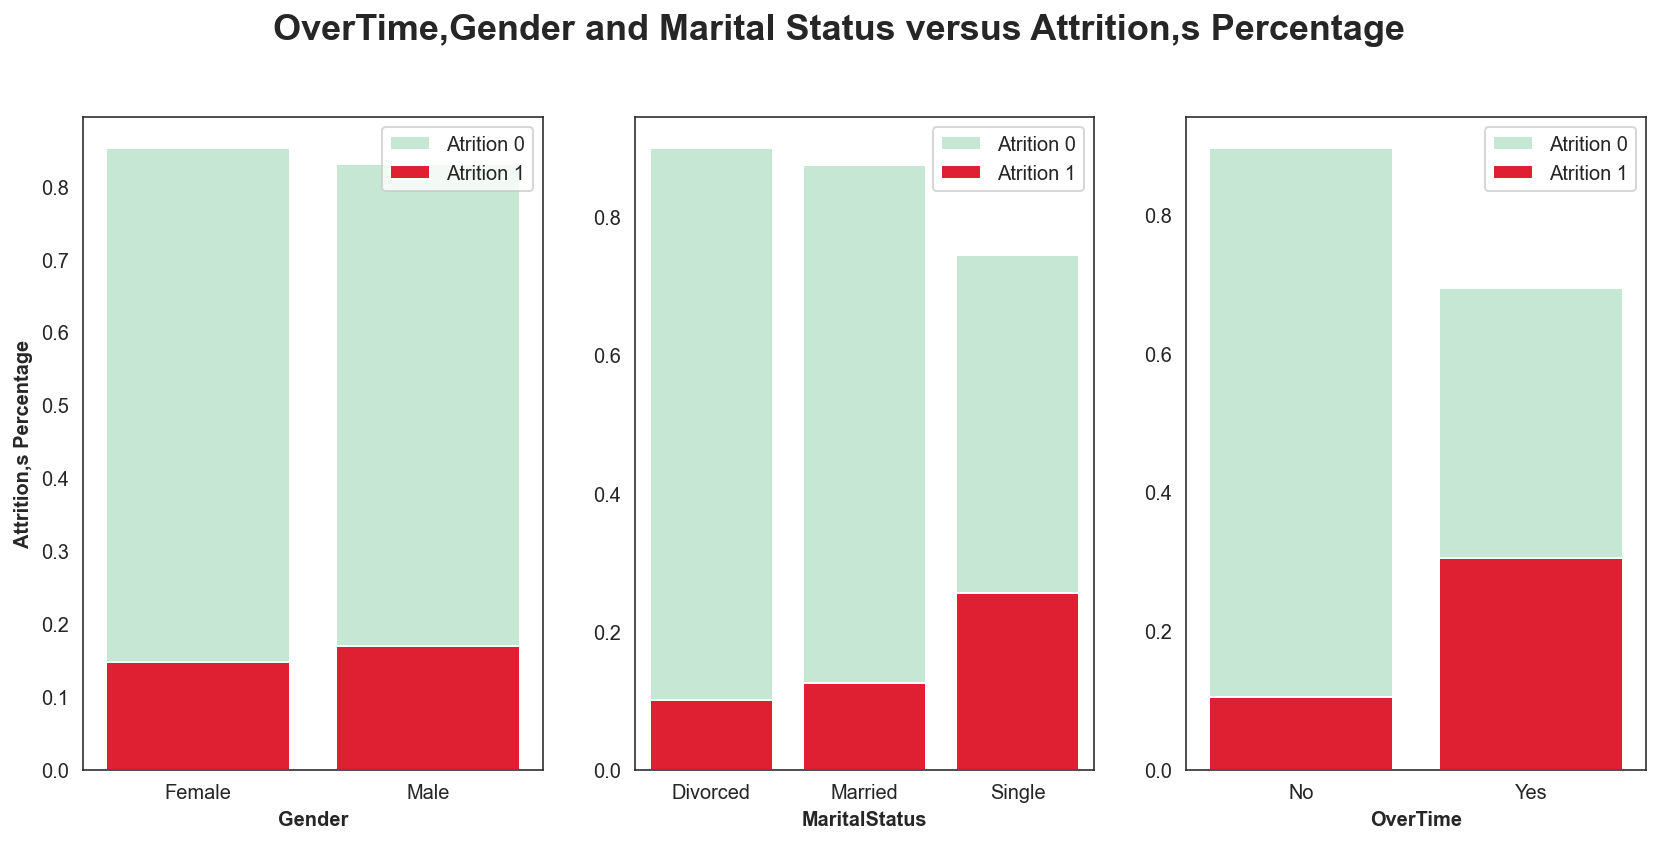

In [26]:
# marital status and gender
#colors = ["#C0EDD2","#FF0018"]
plt.figure(figsize=(14,6))
plt.suptitle('OverTime,Gender and Marital Status versus Attrition,s Percentage',fontweight="bold",fontsize=18,y=1.0)

for i,column in enumerate(["Gender","MaritalStatus","OverTime"],1):
    group =df.groupby(column)["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()

    plt.subplot(1, 3,i)
    sns.barplot(x=group.index,y=('Attrition_numeric', 0),data=group,color="#C0EDD2",label="Atrition 0")
    sns.barplot(x=group.index,y=('Attrition_numeric', 1),data=group,color="#FF0018",label="Atrition 1")
    if i == 1:
        plt.ylabel("Attrition,s Percentage",fontweight="bold")
    else:
        plt.ylabel("",fontweight="bold")
    plt.xlabel(column,fontweight="bold")
    plt.legend()
    plt.grid(False) 
    
    


 Gender does not influence much, but being single and working a lot of overtime are important factors to take into account.

Working far away from home is also important, here we see that from 10 km away it begins to be noticed in the attrition rate 

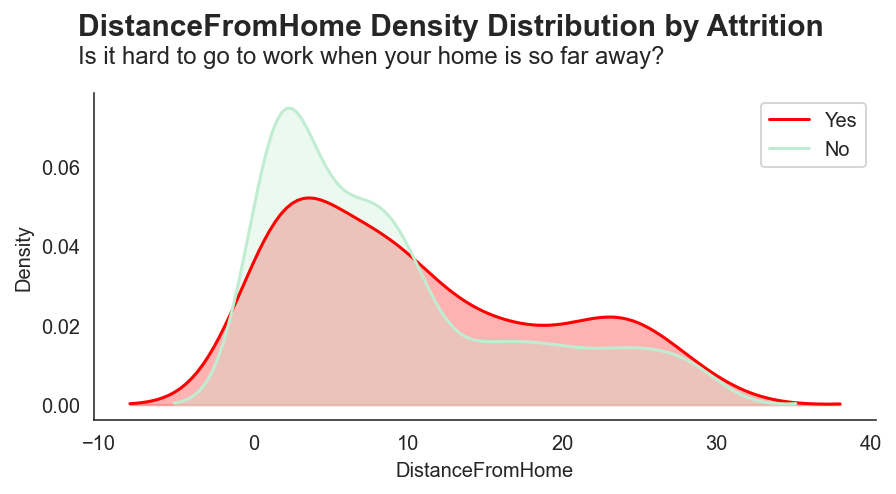

In [27]:
plt.figure(figsize=(7,3))
ax = sns.distplot(attrition_yes["DistanceFromHome"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["DistanceFromHome"],hist=False,label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(-11.35,0.093,"DistanceFromHome Density Distribution by Attrition",
        fontsize=15,        
         fontweight='bold') 
ax.text(-11.35,0.086,"Is it hard to go to work when your home is so far away?",
        fontsize=12)
plt.show(block=False)

with the cut function I will make three groups: those who live up to 10,20 and 30 km away from work; then we make groupby and with value counts (normalize) we see the percentages in relation to Attriction

In [28]:
cut_distance = pd.cut(df["DistanceFromHome"],bins=[1,10,20,30],include_lowest=False)
df.groupby(cut_distance)["Attrition_numeric"].value_counts(normalize=True).unstack()

Attrition_numeric,0,1
DistanceFromHome,,
"(1, 10]",0.855746,0.144254
"(10, 20]",0.800000,0.200000
"(20, 30]",0.779412,0.220588


we find that as the distance increases, the attrition rate rises from 14 to 22 percent.

### Monthly Income

money influences? first we will look at the salary by gender and by JobRoles; in this fictitious company there is no significant difference between the two genders. 

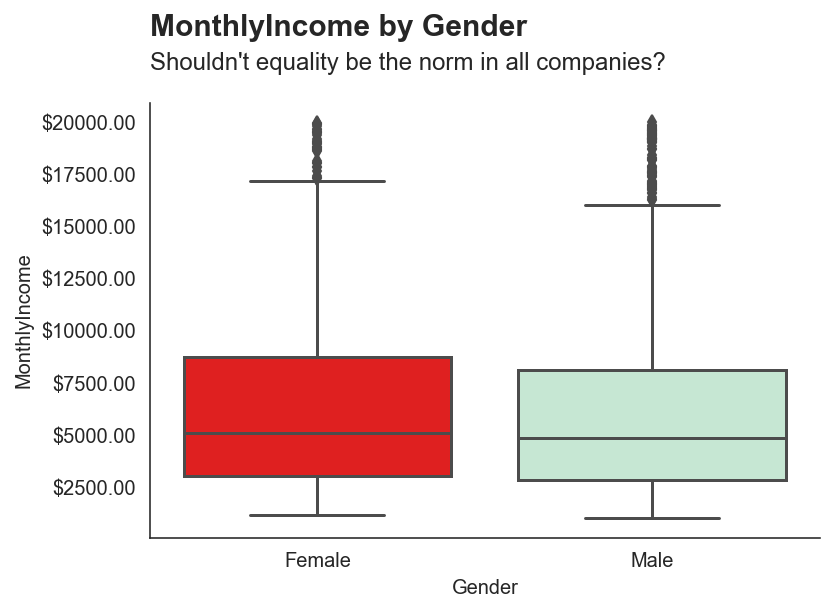

In [31]:
ax = sns.boxplot(x="Gender",y='MonthlyIncome',data=df,palette={"Female":"red","Male":"#C0EDD2"})
sns.despine()
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
#plt.title("MonthlyIncome by Gender",fontweight="bold")
#plt.title("$\\bf{MonthlyIncome by Gender}$" +"\nShouldn't equality be the norm in all companies??")
ax.text(-0.5,24150,"MonthlyIncome by Gender",
        fontsize=15,        
         fontweight='bold') 
ax.text(-0.5,22550,"Shouldn't equality be the norm in all companies?",
        fontsize=12)
plt.show(block=False)

In [41]:
df.pivot_table('MonthlyIncome',index="JobRole",columns="Gender")


Gender,Female,Male
JobRole,,
Healthcare Representative,7433.803922,7589.300000
Human Resources,4540.687500,4100.222222
Laboratory Technician,3246.905882,3232.413793
Manager,16915.276596,17409.327273
Manufacturing Director,7409.166667,7182.671233
Research Director,15144.484848,16657.787234
Research Scientist,3344.473684,3173.044944
Sales Executive,6764.310606,7033.123711
Sales Representative,2671.947368,2587.200000


now let's look at the salaries by department and their relation to the average of the whole company 

In [38]:
jobrole_income = df.groupby("JobRole")["MonthlyIncome"].describe()
#obrole_income.style.background_gradient(cmap='Blues',axis=0)

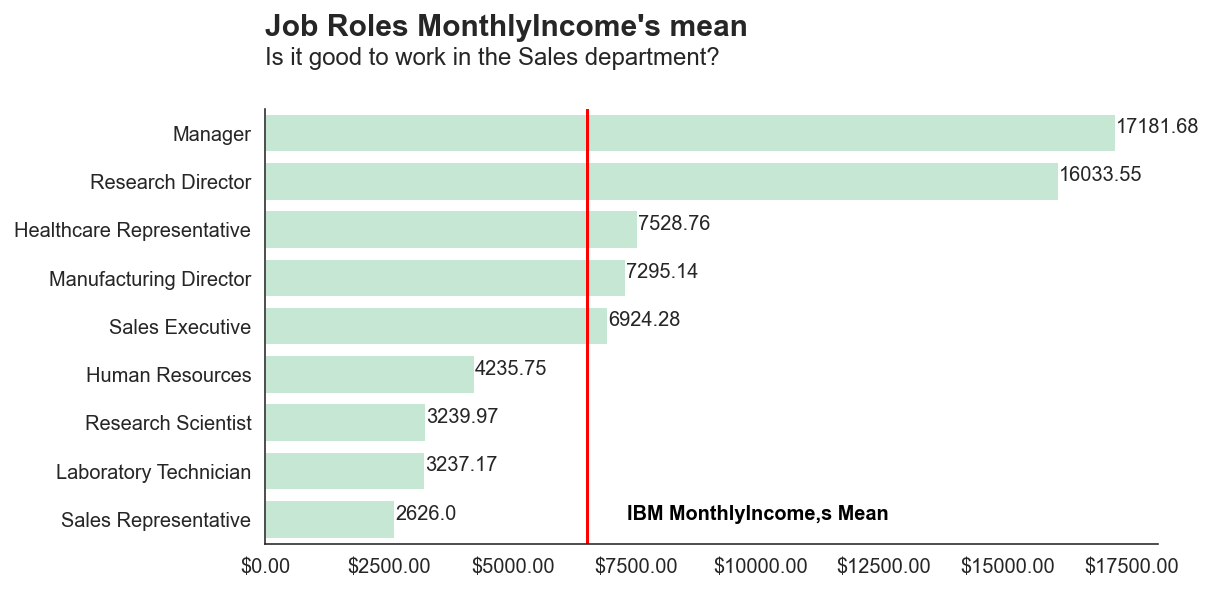

In [33]:
job_income_mean = jobrole_income["mean"].reset_index().sort_values(by="mean",ascending=False)


plt.figure(figsize=(8,4))
ax = sns.barplot(y="JobRole",x="mean",data=job_income_mean,color="#C0EDD2")
# with axvline we can draw a vertical line
ax.axvline(df['MonthlyIncome'].mean(),color="red")

plt.ylabel("")
plt.xlabel("")
plt.grid(False)
sns.despine()
# add $ to axis
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)
# add text anotation
ax.text(7300, 8, "IBM MonthlyIncome,s Mean", horizontalalignment='left', size='medium', color='black', weight='semibold')
for text,num in zip(round(job_income_mean["mean"],2),range(9)):
    ax.text(text,num,text)
ax.text(-0.3,-2,"Job Roles MonthlyIncome's mean",
        fontsize=15,        
         fontweight='bold') 
ax.text(-0.3,-1.4,"Is it good to work in the Sales department?",
        fontsize=12) 
plt.show(block=False)


we are going to make a graph that reflects salaries, years worked in the company, satisfaction level and  the attrition rate

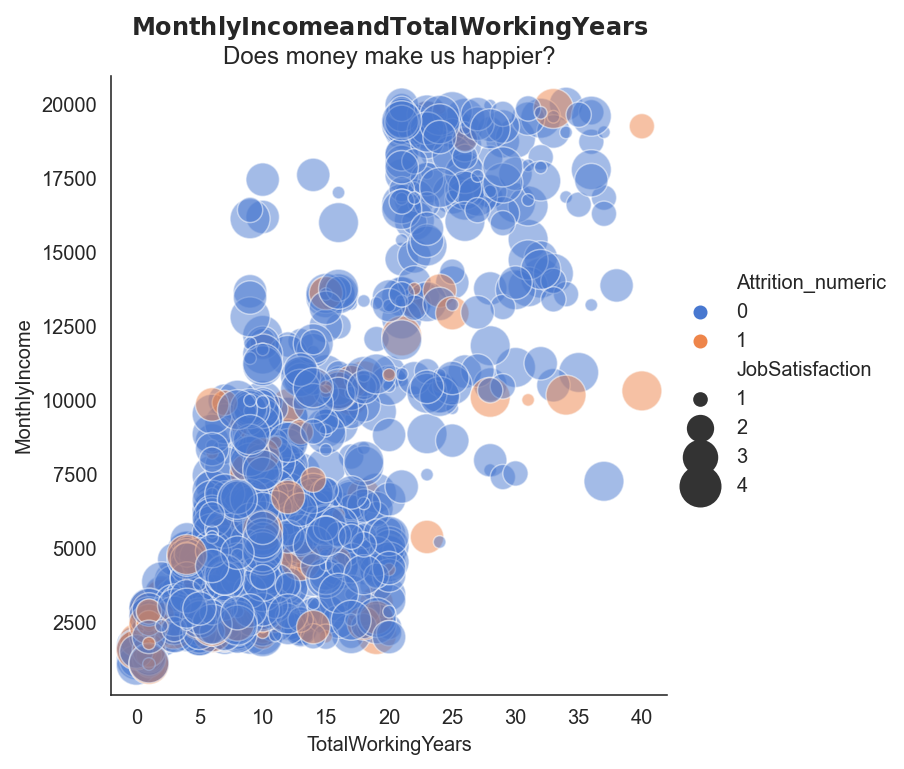

In [44]:

ax=sns.relplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition_numeric', size='JobSatisfaction',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=df)
sns.despine()
plt.title("$\\bf{MonthlyIncome and TotalWorkingYears}$" +"\nDoes money make us happier?")
 
plt.show(block=False)




Several things stand out here:

* after 20 years of work in the company there is a significant salary increase

* the degree of satisfaction is fairly evenly distributed, so we will have to look at it in more detail.

* the vast majority of workers seem to be between $10,000 and 20 years of service

*  The $10,000 salary seems to be a good indicator in this respect to the attrition rate, since above it seems that there is less

In [48]:
cut_income = pd.cut(df["MonthlyIncome"],bins=[1000,5000,10000,15000,20000],include_lowest=False)
cut_years= pd.cut(df['TotalWorkingYears'],bins=[0,10,20,30,40],include_lowest=False)
df.pivot_table('Attrition_numeric',index=cut_income,columns=cut_years)


TotalWorkingYears,"(0, 10]","(10, 20]","(20, 30]","(30, 40]"
MonthlyIncome,,,,
"(1000, 5000]",0.229032,0.135593,NaN,NaN
"(5000, 10000]",0.123636,0.091503,0.090909,0.000000
"(10000, 15000]",0.076923,0.136364,0.134615,0.176471
"(15000, 20000]",0.000000,0.000000,0.030612,0.071429


with pd.cut I have made groups in both MonthlyIncome and TotalWorkingYears and with pd.pivot_table I relate them to each other.

* workers who have worked up to 10 years and with a salary up to $5000 have a higher attrition rate.

* and those who have been working for 30 to 40 years with a salary between $10,000 and $15,000 also have a significant attrition rate as we saw in the graph.


well this has been an exploratory analysis where we have seen significant aspects regarding the attrition rate in a company; now we need to use machine learning to try to be able to predict it... but that will be for another time when I have more time.
I hope you liked it and please, if you have any comments, advice, criticism and help do not hesitate to write it in the comments !